In [3]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from uncertainties import ufloat
from uncertainties.umath import *  # sin(), etc.
import uncertainties.umath
import uncertainties

In [7]:
#read data
data = pd.read_csv('Refraction_glass.csv') #read data
data = data.head(10)
d = ufloat(0.535, 0.005) * 10**(-2) #glass thickness in m
lamda = 632.8 * 10**(-9) #laser wavelength in m
#add uncertainties to our values
ang = np.ones(len(data)) * ufloat(0,0) #angle
m = np.ones(len(data)) * ufloat(0,0) # ringcount values as changes from previous angle to written angle
for i in range(0,len(data)):
    ang[i] = ufloat(data['degree (circ)'][i], 1)
    m[i] = ufloat(data['Ringcount'][i], 1)

#calculate angle in rad
ang_rad = ang * np.pi / 180

#calculate fringe changes as total changes from angle 0
m_tot = np.ones(len(data)) * ufloat(0,0)
for i in range(len(data)):
    m_tot[i] = m[i]
    
for i in range(1,5):
    m_tot[i] = m_tot[i] + m_tot[i-1]
    m_tot[9-i] = m_tot[9-i] + m_tot[10-i]

#use m_tot
#equivalent change in length per fringe change
D2 = m_tot * lamda
#calculate refraction index with formula from script
n2 = 1 / (1 - D2 / (d * ang_rad**2))
#fix error for -2 deg? no idea why
n2[9] = 1/(1-D2[9]*0.7/(d*ang_rad[9]**2))
#take average of every value
n = [n2[i].n for i in range(len(n2))]
N2 = np.average(n2)
N2e = np.std(n)
print(N2,N2e) 
print(m_tot)

1.91+/-0.29 0.22979970516826448
[4.0+/-1.0 18.0+/-1.4142135623730951 39.0+/-1.7320508075688772 73.0+/-2.0
 103.0+/-2.23606797749979 126.0+/-2.23606797749979 94.0+/-2.0
 52.0+/-1.7320508075688772 21.0+/-1.4142135623730951 7.0+/-1.0]


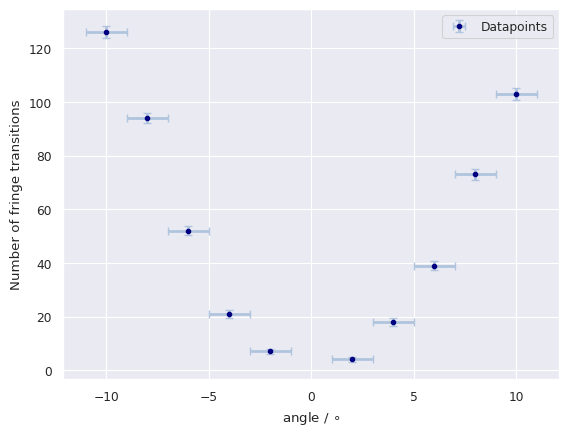

In [10]:
#plot results
sns.set_theme(style="darkgrid")
sns.set_context("paper")

#fig, axs = plt.subplots(1,2,figsize=(10, 8))
plt.errorbar(x = data['degree (circ)'], y = [m_tot[i].n for i in range(len(m_tot))], xerr = np.ones(len(data)), yerr = [m_tot[i].s for i in range(len(m_tot))], markersize=6, fmt=".",color="navy", ecolor="lightsteelblue", elinewidth=2, capsize=3, label="Datapoints")
plt.xlim = (-15, 15)
plt.xlabel('angle / $\mathregular{\circ}$')
plt.ylabel('Number of fringe transitions')
plt.legend()

#axs[1].errorbar(x = data['degree (circ)'], y = [n1[i].n for i in range(len(m))], xerr = np.ones(len(data)), yerr = [n1[i].s for i in range(len(m))], markersize=6, fmt=".",color="navy", ecolor="lightsteelblue", elinewidth=2, capsize=3, label="Datapoints")


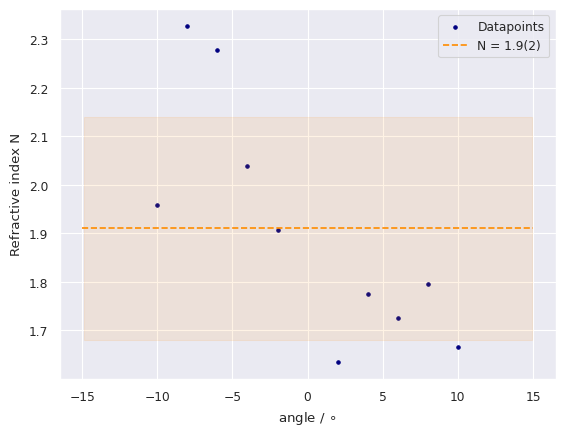

In [11]:
plt.scatter(data['degree (circ)'], [n2[i].n for i in range(len(n2))], s=6, c="navy", label="Datapoints")
plt.plot(np.linspace(-15, 15, 100),np.ones(len(np.linspace(-15, 15, 100))) * N2.n, color = 'darkorange', linestyle = '--', label = 'N = 1.9(2)')
plt.fill_between(np.linspace(-14.9, 14.9, 100), (N2.n-N2e), (N2.n+N2e), color='darkorange', alpha=.1)
plt.xlim = [-15, 15]
plt.ylim = [0, 10]
plt.xlabel('angle / $\mathregular{\circ}$')
plt.ylabel('Refractive index N')
plt.legend()